### XGBoost
XGBoost是目前 Kaggle競賽中最常見到的演算法


![image](./img/XGBoost1.jpg)

1. XGBoost 全名為eXtreme Gradient Boosting
2. 以Gradient Boosting 為基礎下去實作
3. 每一棵樹是互相關聯的
4. 和隨機森林一樣採用特徵隨機採樣的技巧
5. 是Ensemble learning中的Boosting的實例

### Bagging vs. Boosting
1. Bagging 透過抽樣的方式生成樹，每顆樹彼此獨立
2. Boosting 透過序列的方式生成樹，後面生成的樹與前一棵樹相關

![image](./img/BaggingBoosting.jpg)

In [45]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

### 一)載入資料集

In [46]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 二)手動編碼

In [47]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


### 三)檢查缺失值

In [48]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### 四)切割訓練集與測試集

In [49]:
from sklearn.model_selection import train_test_split
X = df_train.drop(labels=["Class","variety"],axis=1)
y = df_train["Class"]
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size = .3 , random_state=42)

In [50]:
print("Training data shape : ",X_train.shape)
print("Testing data shape : ", X_test.shape)

Training data shape :  (105, 4)
Testing data shape :  (45, 4)


### XGBoost
Boosting 則是希望能夠由後面生成的樹，來修正前面樹，學得不好的地方

Paremeter:
1. n_estimators : 總共迭代的次數，即決策樹的個數，預設值為100
2. max_depth : 樹的最大深度，默認值為6
3. booster : gbtree 樹模型(預設) / gblinear 線性模型
4. learning_rate : 學習速率 ， 預設0.3
5. gamma : 懲罰項係數，指定節點分裂所需的最小損失函數下降值

Attributes :
1. feature_importances_ : 查詢模型特徵的重要程度

Methods :
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. score : 預測成功的比例
4. predict_proba : 預測每個類別的機率值


In [51]:
import xgboost as xgb
#from xgboost import XGBRFClassifier

# #建立XGBClassifier 模型
# xgboostModel = XGBRFClassifier(learning_rate=0.3)

# #使用訓練資料訓練模型
# xgboostModel.fit(X_train,y_train)

# #使用訓練資料預測分類
# predicted = xgboostModel.predict(X_train)

# training
model = xgb.XGBClassifier(n_estimators=100, learning_rate= 0.3)
model.fit(X_train, y_train,
eval_set=[(X_train, y_train), (X_test, y_test)],
early_stopping_rounds=20)

[0]	validation_0-mlogloss:0.75352	validation_1-mlogloss:0.73218
[1]	validation_0-mlogloss:0.54945	validation_1-mlogloss:0.51707
[2]	validation_0-mlogloss:0.41248	validation_1-mlogloss:0.37704
[3]	validation_0-mlogloss:0.31732	validation_1-mlogloss:0.28422
[4]	validation_0-mlogloss:0.24966	validation_1-mlogloss:0.21843
[5]	validation_0-mlogloss:0.20055	validation_1-mlogloss:0.17083
[6]	validation_0-mlogloss:0.16427	validation_1-mlogloss:0.13462
[7]	validation_0-mlogloss:0.13548	validation_1-mlogloss:0.10635
[8]	validation_0-mlogloss:0.11357	validation_1-mlogloss:0.08659
[9]	validation_0-mlogloss:0.09650	validation_1-mlogloss:0.07241
[10]	validation_0-mlogloss:0.08407	validation_1-mlogloss:0.06024
[11]	validation_0-mlogloss:0.07477	validation_1-mlogloss:0.05240
[12]	validation_0-mlogloss:0.06721	validation_1-mlogloss:0.04491
[13]	validation_0-mlogloss:0.06091	validation_1-mlogloss:0.03987
[14]	validation_0-mlogloss:0.05540	validation_1-mlogloss:0.03657
[15]	validation_0-mlogloss:0.05104	

d:\data_process_library_demo_log\env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-mlogloss:0.02679	validation_1-mlogloss:0.01567
[45]	validation_0-mlogloss:0.02636	validation_1-mlogloss:0.01510
[46]	validation_0-mlogloss:0.02612	validation_1-mlogloss:0.01499
[47]	validation_0-mlogloss:0.02590	validation_1-mlogloss:0.01500
[48]	validation_0-mlogloss:0.02565	validation_1-mlogloss:0.01454
[49]	validation_0-mlogloss:0.02542	validation_1-mlogloss:0.01412
[50]	validation_0-mlogloss:0.02523	validation_1-mlogloss:0.01398
[51]	validation_0-mlogloss:0.02501	validation_1-mlogloss:0.01363
[52]	validation_0-mlogloss:0.02483	validation_1-mlogloss:0.01348
[53]	validation_0-mlogloss:0.02466	validation_1-mlogloss:0.01325
[54]	validation_0-mlogloss:0.02450	validation_1-mlogloss:0.01313
[55]	validation_0-mlogloss:0.02431	validation_1-mlogloss:0.01283
[56]	validation_0-mlogloss:0.02415	validation_1-mlogloss:0.01271
[57]	validation_0-mlogloss:0.02397	validation_1-mlogloss:0.01279
[58]	validation_0-mlogloss:0.02379	validation_1-mlogloss:0.01264
[59]	validation_0-mloglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [52]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [53]:
# save in JSON format
model.save_model("model_sklearn.json")

### 使用Score評估模型

In [54]:
#預測成功的比例
print("訓練集: ",xgboostModel.score(X_train,y_train))

print("測試集: ",xgboostModel.score(X_test,y_test))

ValueError: Feature shape mismatch, expected: 5, got 4

### 特徵重要程度

特徵重要程度:  [0.03390711 0.11363838 0.44287875 0.4095758 ]


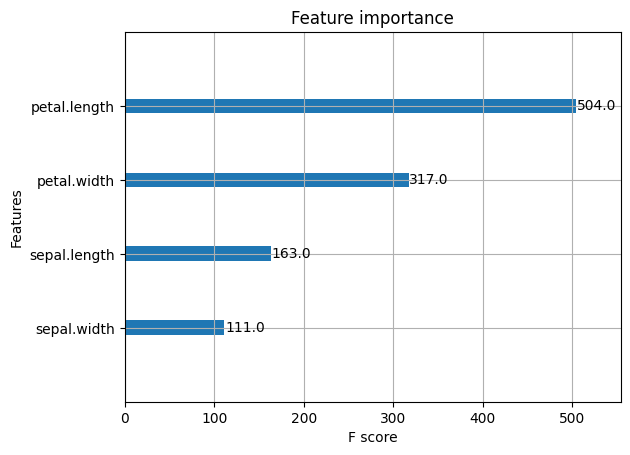

In [ ]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)

print("特徵重要程度: " , xgboostModel.feature_importances_)

### 真實分類

In [ ]:
# 建立訓練集的DataFrame
df_train = pd.DataFrame(X_train)
df_train["Class"] = y_train

#建立測試集的DataFrame

df_test = pd.DataFrame(X_test)
df_test["Class"] = y_test

In [ ]:
sns.lmplot("petal.length","petal.width",hue="Class",data=df_train,fit_reg=False)

TypeError: lmplot() got multiple values for argument 'data'

### XGBooost(訓練集)預測結果

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


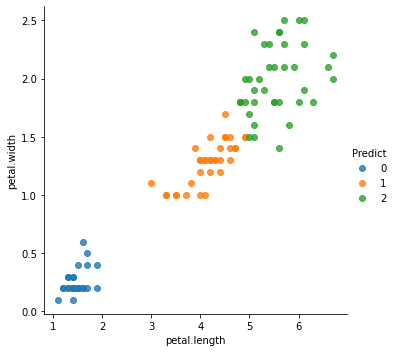

In [ ]:
df_train["Predict"] = predicted
sns.lmplot('petal.length',"petal.width",data=df_train,hue="Predict",fit_reg=False)

plt.show()